# PHYS 309 Assignment 1

### Getting started

<ul>
    <li><strong>I strongly recommend that you install <tt>python</tt> and <tt>Jupyter notebook</tt> on your own computer.</strong> The <a href="https://www.anaconda.com/products/distribution">Anaconda <tt>python</tt> distribution</a> is free for individual use. You may also use <a href="https://colab.research.google.com/">Google colab</a>, but it has session time limitations.</li>
    <li>Download this notebook to your own computer, open with <tt>Jupyter</tt> notebook or lab, and complete the missing code. See the <a href="https://docs.jupyter.org/en/latest/start/index.html"><tt>Jupyter</tt> documentation</a> for help.</li>
</ul>

<strong>For full credit, you must do the following:</strong>
<ul>
    <li>Instead of putting in the values of physical constants such as $c$ and $\epsilon_0$ by hand, use SI values pre-programmed into [scipy.constants](https://docs.scipy.org/doc/scipy/reference/constants.html). For example, $\mu_0$ is <tt>constants.mu_0</tt>.</li>
    <li>Instead of native <tt>python</tt> lists, use <a href="https://numpy.org/doc/stable/user/absolute_beginners.html">NumPy</a> arrays. Change<br />
    &nbsp; &nbsp; <tt>r = []<br />
    &nbsp;  for i in range(100):<br />
    &nbsp; &nbsp; &nbsp; r.append(i)<br /></tt>
    to<br />
    &nbsp; &nbsp;  <tt>r = <a href="https://numpy.org/doc/stable/reference/generated/numpy.arange.html">np.arange(100)</a></tt>
    </li>   
</ul>

### Set up <tt>python</tt> environment

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Contains physical constants defined in SI units (default) as well as other systems
from scipy import constants
from scipy.constants import pi
from scipy.constants import epsilon_0
from scipy.constants import e
from scipy.constants import mu_0
from scipy.constants import c


# Image display
#  (there are multiple ways to do this; the line below facilitates one of them)
from PIL import Image

# Make easily readable plots with large axis labels
plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})


### Questions


Recall that the speed of light in vacuum is 
\begin{equation}
c = \frac{1}{\sqrt{\epsilon_0 \mu_0}}, \; \; \; \; \; (1)
\end{equation}
where $\epsilon_0 = 8.85 \times 10^{-12}$ F/m (Farads per meter)$^{*}$ is the electric permittivity of free space and $\mu_0 = 1.26 \times 10^{-6}$ N/A$^2$ (Newtons per Ampere$^2$)$^{**}$ is the magnetic permeability of free space. The electric field created by a point charge $q$ is
\begin{equation}
E = \frac{1}{4 \pi \epsilon_0} \frac{q}{r^2}. \; \; \; \; (2)
\end{equation}
Suppose a charged particle is moving at some fraction of the speed of light in vacuum ($v_q = f c; \; 0 < f < 1$) as seen in reference frame $S$. Reference frame $S^{\prime}$ is co-moving with the point charge, so that $\frac{dx^{\prime}}{dt^{\prime}} = v^{\prime}_q = 0$ in frame $S^{\prime}$. To make the math easier, put $q$ at the origin of $S^{\prime}$.

To understand Einstein's motivation for developing the special theory of relativity, make the <strong>incorrect, erroneous, and wrong</strong> assumption that the Galilean velocity transformation holds true for all values of $f$:
\begin{equation}
\frac{dx^{\prime}}{dt^{\prime}} = \frac{dx}{dt} - v_q \; \; \; (3)
\end{equation}

<ol>
    <li>Assume the charged particle is an electron. Using Equation 2, calculate and plot the electric field as a function of distance $r^{\prime}$ from $q$ in frame $S^{\prime}$. Choose an x-axis range that makes sense to you and label both axes with correct units.</li>
</ol>

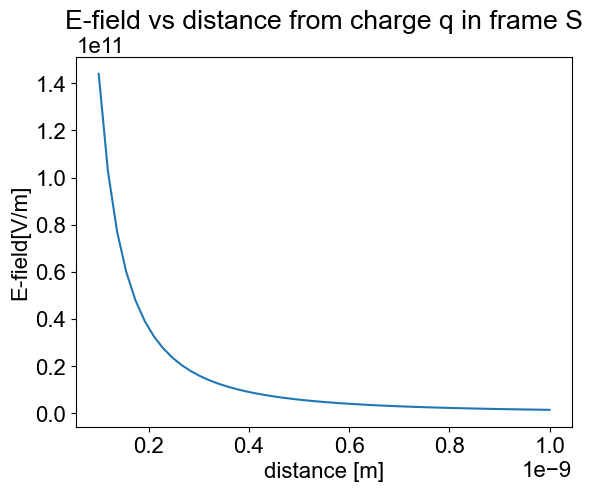

In [5]:
# Plot here
r=np.linspace(1e-10, 1e-9)
plt.plot (r, 1/((4*pi)*epsilon_0)*(e/r**2))
plt.xlabel ("distance [m]")
plt.ylabel ("E-field[V/m]")
plt.title ("E-field vs distance from charge q in frame S")
plt.show()

<ol start=2>
    <li>The Galilean velocity transformation suggests that objects can "catch up" with light, so that light in a vacuum appears to be going slower than the value of $c$ from Equation (1). Make a plot of $c^{\prime}$, the <strong>incorrect</strong> speed of light in frame $S^{\prime}$ according to the Galilean transformation, as a function of $f$. Put units on the axes where appropriate.</li>
</ol>

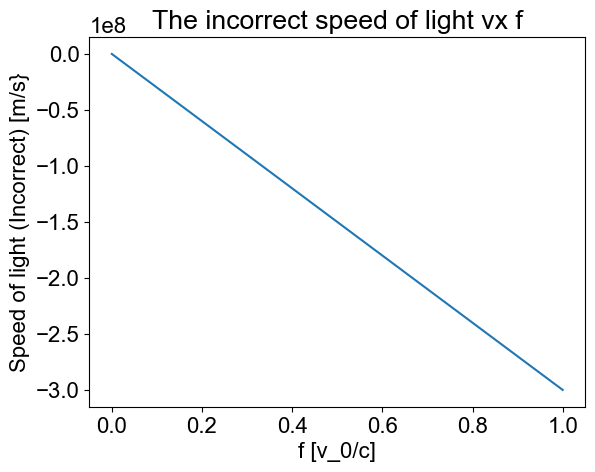

In [6]:
# Plot here
f=np.linspace(0, 1)
plt.plot (f, (-f*(1/math.sqrt(epsilon_0*mu_0))))
plt.xlabel ("f [v_0/c]")
plt.ylabel ("Speed of light (Incorrect) [m/s}")
plt.title ("The incorrect speed of light vx f")
plt.show()

<ol start=3>
    <li>In frame $S^{\prime}$, something has to give: either Equation (1) is no longer true, or the values of $\epsilon_0$ and/or $\mu_0$ have to change. Suppose Equation (1) is still true and $\mu_0 = \mu_0^{\prime}$. Make a plot with two vertically stacked subplots. The top subplot should show $\epsilon_0^{\prime}$ as a function of $f$, while the bottom plot should show the electric field $E^{\prime} = \frac{1}{4 \pi \epsilon_0^{\prime}} \frac{q}{{r^{\prime}}^2}$ at $r^{\prime} = 1 \mu \mathrm{m} = 10^{-6}$ m as a function of $f$. Put units on the axes where appropriate.</li>
</ol>

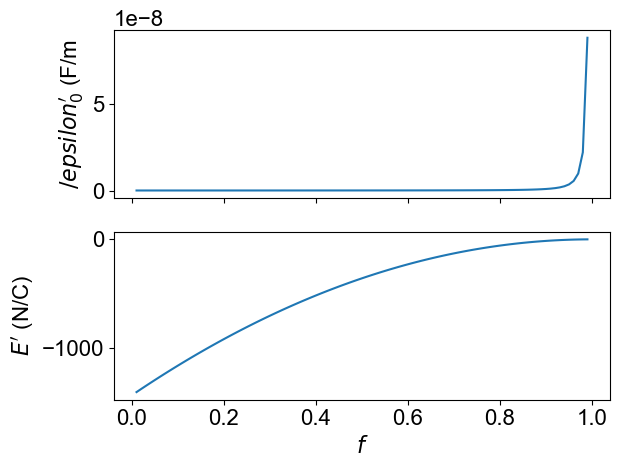

In [7]:
# Plot here
#Epsilon nought prime
fs=np.arange (0.01, 1, 0.01)
eps_0ps = 1 / (constants.mu_0 * constants.c**2 * (1-fs)**2)

#e-field
Eps = (1/(4*constants.pi * eps_0ps)) * (-constants.e / 1e-6**2)

#plot
fig, axs = plt.subplots(2, sharex=True)
axs[0].plot(fs, eps_0ps)
axs[1].plot(fs, Eps)
plt.xlabel(r"$f$")
axs[0].set_ylabel(r"$/epsilon_0'$ (F/m")
axs[1].set_ylabel(r"$E'$ (N/C)")
plt.show()


<ol start=4>
    <li>Now assume $f = 0.5$. In the same plot window, plot $E^{\prime}(r^{\prime})$ given by Equation 2 (same curve as in Problem 1) <em>and</em> $E^{\prime}(r^{\prime})$ calculated as in Problem 3, where $\epsilon_0^{\prime}$ is a function of $f$. Do you notice a problem?</li>
</ol>

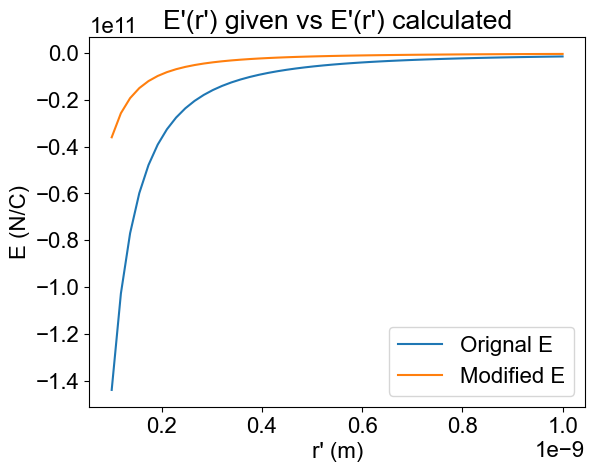

In [8]:
# Plot here
f_val = 0.5
c_p=c*(1-f_val)
epsilon0_p=1/(mu_0*c_p**2)

E_original = (1/(4*np.pi*epsilon_0))*(-constants.e/r**2)
E_modified = (1/(4*np.pi*epsilon0_p))*(-constants.e/r**2)

plt.plot(r, E_original, label="Orignal E")
plt.plot(r, E_modified, label="Modified E")
plt.legend()
plt.xlabel("r' (m)")
plt.ylabel("E (N/C)")
plt.title("E'(r') given vs E'(r') calculated")
plt.show()

<ol start=5>
    <li>To resolve the issues revealed by the plot from Problem 4, you may suggest setting $\epsilon_0^{\prime} = \epsilon_0$ and allowing $\mu_0^{\prime}$ to vary with $f$. Let's explore that solution. To accompany the point charge in problems 1-4, add a current loop that's also at rest in frame $S^{\prime}$. Recall that the magnitude of the magnetic field strength at the center of the loop in frame $S$ is $B = \frac{\mu_0 I}{2R}$, where $I$ is the current and $R$ is the radius of the loop. Suppose $I = 1$ A and $R = 1$ m. Assume $E^{\prime} = E$, $B^{\prime} = B$, and $c^{\prime}$ depends on $f$ as in problem 2. Plot $\mu_0$ as a function of $f$.</li>
</ol>

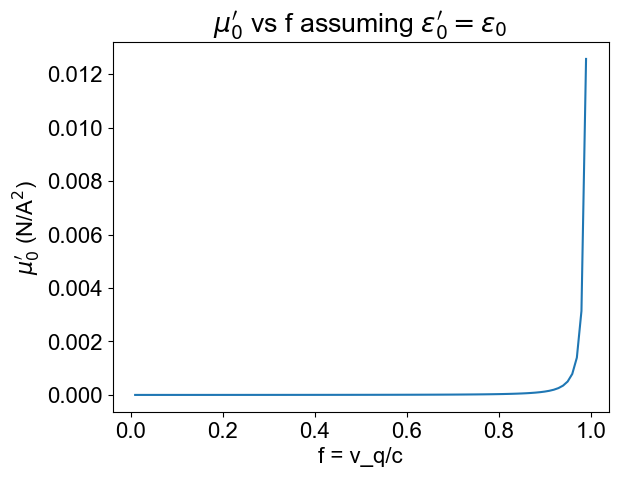

In [9]:
# Plot here

mu0_prime = mu_0 / (1 - fs)**2

plt.plot(fs, mu0_prime)
plt.xlabel("f = v_q/c")
plt.ylabel(r"$\mu_0'$ (N/A$^2$)")
plt.title(r"$\mu_0'$ vs f assuming $\varepsilon_0' = \varepsilon_0$")
plt.show()


<ol start=6>
<li>If we calculate $c^{\prime}$ using the Galilean transformation in Equation 3, is there any value of $f$ for which $E^{\prime} = E$ <strong>and</strong> $B^{\prime} = B$? Make a graph to illustrate your answer.</li>
</ol>

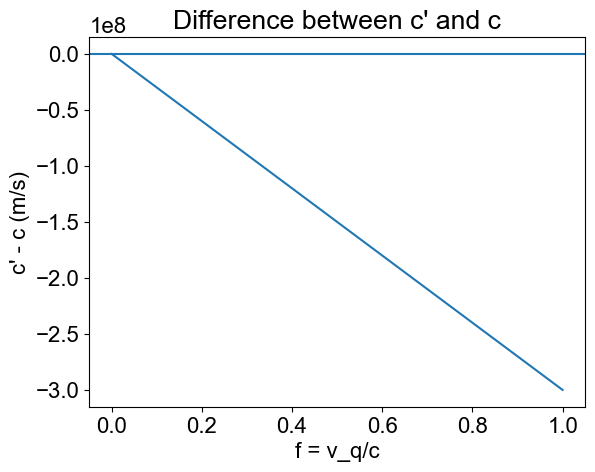

In [10]:
# Plot here
fs = np.linspace(0, 1, 500)

c_prime = c * (1 - fs)

plt.plot(fs, c_prime - c)
plt.axhline(0)
plt.xlabel("f = v_q/c")
plt.ylabel("c' - c (m/s)")
plt.title("Difference between c' and c")
plt.show()

Conceptual questions about the conflict between the Galilean velocity transformation and E&M are in the written homework assignment.

$^{*}$Farad = Coulomb/Volt: Farad is the unit of capacitance, which measures the amount of charge necessary to increase the electric potential of a system by 1 Volt. Farads/meter measure how much capacitance you get per meter of free space between yourself and a charged particle.

$^{**}$Newtons/Ampere$^2$ = Newtons/(Coulombs/second)$^2$. $\mu_0$ measures how effective inductance is at creating magnetic force in free space.

<strong>Getting set up for the class research project:</strong>
<ol start=7>
    <li>Go to the download page for <a href="https://www.cosmos.esa.int/web/herschel/hipe-download">HIPE</a> (Herschel Interactive Processing Environment)</li>
    <li>Choose and download the appropriate version of HIPE for your computer</li>
    <li>Open HIPE on your computer and take a screenshot of the landing page. Use the code cell below to display your screenshot.</li>
</ol>

In [ ]:
#I unfortunatley was not able to download this on my windows 11 laptop.